In [1]:
%matplotlib inline

# General imports
from itertools import product
import matplotlib
# import numba
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Basic imports and functions
from sympy import latex, symbols, sin, cos, pi, simplify, lambdify, Matrix
from scipy.integrate import solve_ivp



from sympy.diffgeom import (
    Manifold,
    Patch,
    CoordSystem,
    metric_to_Christoffel_2nd,
    TensorProduct as TP
)

def lprint(v):
    display(Math(latex(v)))

In [2]:
# Create a manifold.
M = Manifold('M', 4)

# Create a patch.
patch = Patch('P', M)

# Basic symbols
c, r_s = symbols('c r_s')

# Coordinate system
schwarzchild_coord = CoordSystem('schwarzchild', patch, ['t', 'r', 'theta', 'phi'])

# Get the coordinate functions
t, r, theta, phi = schwarzchild_coord.coord_functions()

# Get the base one forms.
dt, dr, dtheta, dphi = schwarzchild_coord.base_oneforms()

# Auxiliar terms for the metric.
dt_2 = TP(dt, dt)
dr_2 = TP(dr, dr)
dtheta_2 = TP(dtheta, dtheta)
dphi_2 = TP(dphi, dphi)
factor = (1 - r_s / r)

# Build the metric
metric = factor * c ** 2 * dt_2 - 1 / factor * dr_2 - r ** 2 * (dtheta_2 + sin(theta)**2 * dphi_2)
metric = factor * c ** 2 * dt_2 - 1 / factor * dr_2 - r ** 2 * (dtheta_2 + sin(theta)**2 * dphi_2)
metric = metric / c ** 2

C:\Users\jmonc\AppData\Local\Temp\ipykernel_15000\3362076562.py:11: SymPyDeprecationWarning: 

Passing a string as the coordinate symbol name to CoordSystem is deprecated.
Pass a Symbol with the appropriate name and assumptions instead.

That is, replace t with Symbol('t', real=True).

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-diffgeom-mutable
for details.

This has been deprecated since SymPy version 1.7. It
will be removed in a future version of SymPy.

  schwarzchild_coord = CoordSystem('schwarzchild', patch, ['t', 'r', 'theta', 'phi'])
C:\Users\jmonc\AppData\Local\Temp\ipykernel_15000\3362076562.py:11: SymPyDeprecationWarning: 

Passing a string as the coordinate symbol name to CoordSystem is deprecated.
Pass a Symbol with the appropriate name and assumptions instead.

That is, replace r with Symbol('r', real=True).

See https://docs.sympy.org/latest/explanation/active-deprecations.html#deprecated-diffgeom-mutable
for details.

This has been 

In [3]:
# Get the Christoffel symbols of the second kind.
christoffel = metric_to_Christoffel_2nd(metric)

for i, j, k in product(range(4), range(4), range(4)):
    if christoffel[i, j, k] != 0:
        display(Math(f'\Gamma^{i}_{{{j},{k}}} = ' + latex(christoffel[i, j, k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [4]:
g_func = lambdify((c, r_s, r, theta), christoffel, modules='numpy')

## Specify c and r_s
def F(t, y):
    u = np.array(y[0:4])
    v = np.array(y[4:8])

    chris = g_func(1, 1, u[1], u[2])

    du = v
    dv = -np.dot(np.dot(chris, v), v)

    return np.concatenate((du, dv))

Text(0, 0.5, 'r')

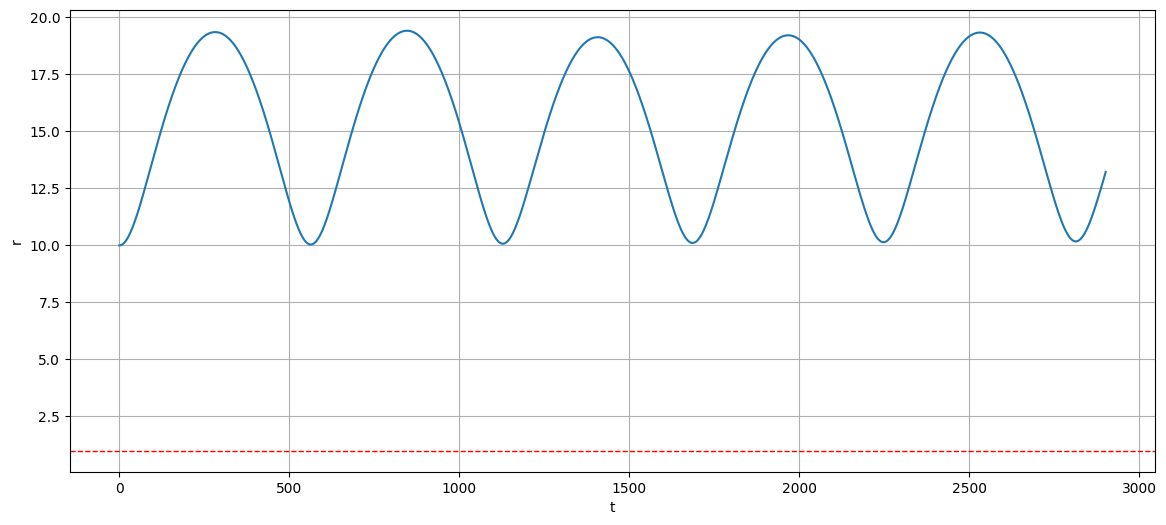

In [5]:
T = 3000
t_eval = np.linspace(0, T, int(T * 123 + 1))
initial_value = [0, 10, np.pi/2, 0, 1, 0, 0, -0.025]

# Solve the initial value problem.
sol = solve_ivp(F, [0, T], initial_value, t_eval=t_eval)

# Plot the solution.
plt.figure(figsize=(14, 6),)
plt.plot(sol.y[0], sol.y[1])
ax = plt.gca()
ax.axhline(1, color="red", ls='--', lw=1)
plt.grid()
plt.xlabel('t')
plt.ylabel('r')

Text(0, 0.5, 'y')

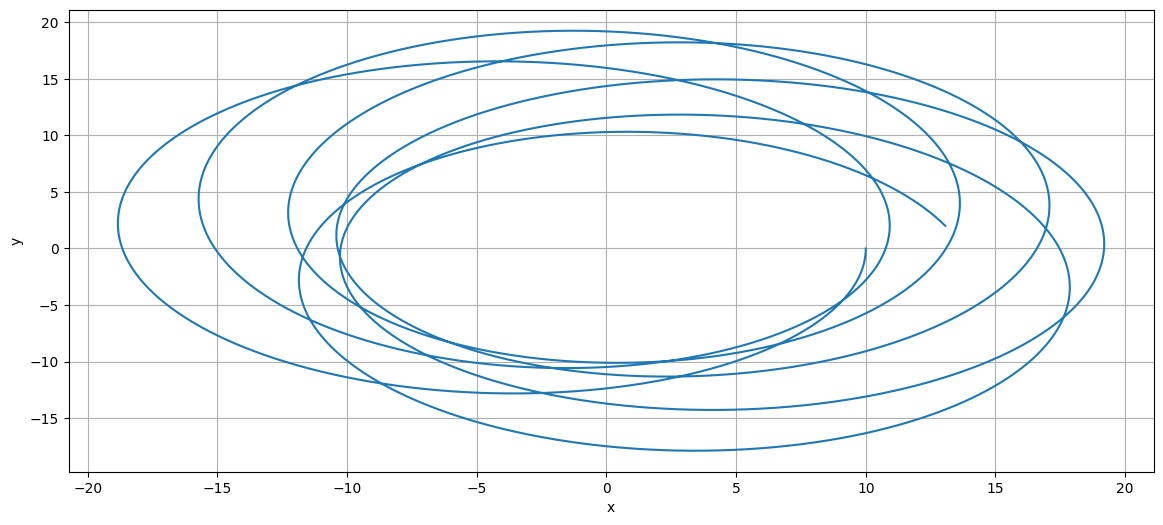

In [6]:
# Plot the solution.
plt.figure(figsize=(14, 6),)
plt.plot(sol.y[1] * np.cos(sol.y[3]), sol.y[1] * np.sin(sol.y[3]))
ax = plt.gca()
# ax.axhline(1, color="red", ls='--', lw=1)
plt.grid()
plt.xlabel('x')
plt.ylabel('y')

In [7]:
print(sol.y[0])

[0.00000000e+00 8.13008130e-03 1.62601626e-02 ... 2.90069843e+03
 2.90070634e+03 2.90071426e+03]


In [ ]:
# Create a manifold.
M = Manifold('M', 4)

# Create a patch.
patch = Patch('P', M)

# Basic symbols
c, r_s = symbols('c r_s')

# Coordinate system
schwarzchild_coord = CoordSystem('schwarzchild', patch, ['t', 'r', 'theta', 'phi'])

# Get the coordinate functions
t, r, theta, phi = schwarzchild_coord.coord_functions()

# Get the base one forms.
dt, dr, dtheta, dphi = schwarzchild_coord.base_oneforms()

# Auxiliar terms for the metric.
dt_2 = TP(dt, dt)
dr_2 = TP(dr, dr)
dtheta_2 = TP(dtheta, dtheta)
dphi_2 = TP(dphi, dphi)
factor = (1 - r_s / r)

dphi_dt = TP(dphi, dt)
rho_2 = r ** 2 + a**2 * np.cos()

# Build the metric
metric = factor * c ** 2 * dt_2 - 1 / factor * dr_2 - r ** 2 * (dtheta_2 + sin(theta)**2 * dphi_2)
metric = metric / c ** 2

# Rewrite metric to be Kerr metric
metric = (1 - r_s / r) * c ** 2 * dt_2 - 1 / (1 - r_s / r) * dr_2 - r ** 2 * (dtheta_2 + sin(theta)**2 * dphi_2)